In [ ]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

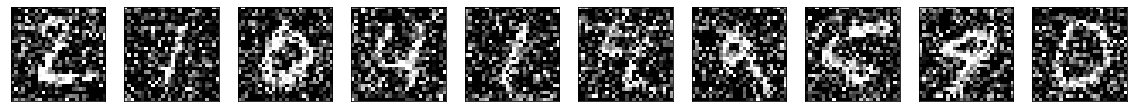

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
model = keras.models.Sequential()

model.add( keras.layers.Input((28,28,1)) )

model.add( keras.layers.Conv2D(16, (3,3), activation='relu', padding ='same', name='convolution1'))
model.add( keras.layers.MaxPooling2D((2,2), padding ='same', name ='pooling1'))
model.add( keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', name ='convolution2'))
model.add( keras.layers.MaxPooling2D((2,2), padding ='same', name ='encoded'))

"""
A present les dimensions de l'image sont (7, 7, 32) 
Pour ce travail et pour améliorer la reconstruction des images bruyantes nous gardons une haute dimensionalité
"""

model.add( keras.layers.Conv2D(32, (3,3), activation='relu', padding ='same', name ='convolution3'))
model.add( keras.layers.UpSampling2D((2,2), name='upsampling1'))
model.add( keras.layers.Conv2D(32, (3,3), activation='relu', padding ='same', name ='convolution4'))
model.add( keras.layers.UpSampling2D((2,2), name ='upsampling2'))
model.add( keras.layers.Conv2D(1, (3,3), activation ='sigmoid', padding ='same', name='decoded'))

model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
model.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/5
469/469 [==============================] - 150s 320ms/step - loss: 0.1288 - val_loss: 0.1147
Epoch 2/5
469/469 [==============================] - 152s 324ms/step - loss: 0.1121 - val_loss: 0.1079
Epoch 3/5
469/469 [==============================] - 150s 320ms/step - loss: 0.1073 - val_loss: 0.1046
Epoch 4/5
469/469 [==============================] - 152s 324ms/step - loss: 0.1049 - val_loss: 0.1027
Epoch 5/5
469/469 [==============================] - 152s 325ms/step - loss: 0.1032 - val_loss: 0.1020


313/313 [==============================] - 6s 20ms/step


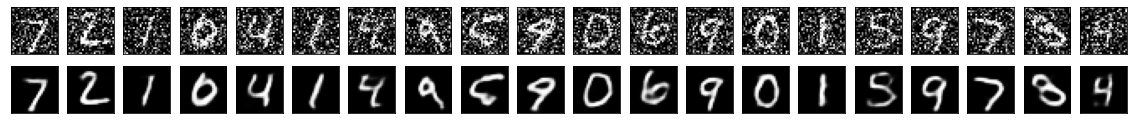

In [ ]:
# Configurations principales de nos modèles
IMG_SIZE          = 28               # taille coté final d'une image en pixel (ici 28x28)
NB_EPOCHS_DENOISE = 10               # nombre epoch alogithme debruiter
NB_EPOCHS_CLASSIF = 10               # nombre epoch alogithme classification des digits
BATCH_SIZE        = 64               # taille batch de traitement
NOISE_FACTOR      = 0.75             # facteur de bruitage gaussian
PLOT_SIZE         = (20,2)           # visualisation matplotlib
DISPLAY_IMG       = 10               # visualisation matplotlib
#SAV_MODEL_DENOISE = "denoiser.h5"    # sauvegarde du modele de debruitage
#SAV_MODEL_PREDICT = "classifier.h5"  # sauvegarde du modele de classification
#NUM_CAT_DIGIT     = 10 

""" decodage et prediction"""
# --- decodage des images bruitées via le réseau de neurones de classification
# --- prédiction de catégorie des images débruitées
decoded_imgs = model.predict(x_test_noisy)


# -- affichage image originale
# -- et de la reconstruction (debruitage)
n = DISPLAY_IMG  * 2
plt.figure(figsize=(PLOT_SIZE))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    #plt.title("Pred: {}".format(predicted_decoded_digit[i]))
    plt.imshow(x_test_noisy[i].reshape(IMG_SIZE, IMG_SIZE))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(decoded_imgs[i].reshape(IMG_SIZE, IMG_SIZE))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()